# CS 3300 Data Science - Lab 1: Data Cleaning

## Stuart Harley

### Introduction

In this lab we are getting our first experience with data cleaning. We are given a csv file of Sacramento area real estate transactions. We explore this data set to get familiar with it. We then engineer a couple new features that may be useful for analyzing or creating an ML model.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the Data and Initial Assessment

In [2]:
df = pd.read_csv('Sacramentorealestatetransactions.csv')
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


The data contains information about Sacremento area real estate transactions. Each transaction represents a property that was sold in the Sacremento area. Each property has an address in the form of a street (String), city (String), zip code (int), and state (String).

Each property has a number of beds (int), baths (int), and a square footage (int). Type (String) describes what category of home it is. And each transaction has a sale date (Date-time) and sale price (int). Also, the latitude (float) and longitude (float) of the properties are included.

None of the columns have any null values.

### Representing Categorical Variables

In [4]:
df['street'].nunique()

981

Streets should be represented as a categorical variable. It doesn't make sense to have them be represented as integers because they have no relation to each other numerically. There is no min or max street.

In [5]:
df['zip'].nunique()

68

Zip codes make more sense as a categorical variable. While a zip code is technically an integer, a zip code with a higher number is not greater than a zip code with a lower number.

In [6]:
df['beds'].nunique()

8

Beds should be an integer value. The integer value represents the number of beds in the house. It makes sense that a higher number of beds is greater than a lower number of beds.

Converting the following variables to categorical variables: city, state, zip, beds, baths, type

In [7]:
cities = df['city'].astype('category')
states = df['state'].astype('category')
zips = df['zip'].astype('category')
beds = df['beds'].astype('category')
baths = df['baths'].astype('category')
types = df['type'].astype('category')

In [8]:
df['city'] = cities
df['state'] = states
df['zip'] = zips
df['beds'] = beds
df['baths'] = baths
df['type'] = types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null category
zip          985 non-null category
state        985 non-null category
beds         985 non-null category
baths        985 non-null category
sq__ft       985 non-null int64
type         985 non-null category
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: category(6), float64(2), int64(2), object(2)
memory usage: 57.5+ KB


### Cleaning Continuous Variables

Plotting histograms of square footage, latitudes, and longitudes.

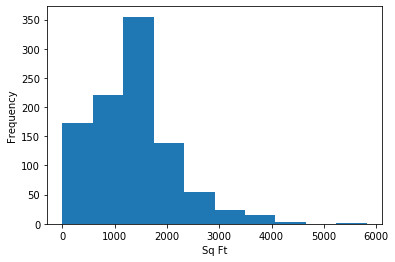

In [10]:
df['sq__ft'].plot.hist()
plt.xlabel('Sq Ft');

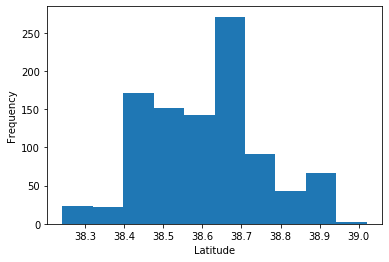

In [11]:
df['latitude'].plot.hist()
plt.xlabel('Latitude');

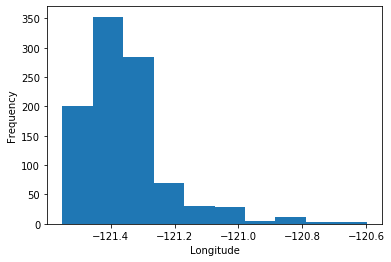

In [12]:
df['longitude'].plot.hist()
plt.xlabel('Longitude');

There is an odd pattern in the square footage plot in that some properties have 0 sqaure footage. A likely explanation is that these properties are empty lots, so since there is no building on them, they have no square footage.

Another explanation is that these properties are garages, or parking structures. You do not count the garage space in a square footage calculation so these properties would have 0 square feet.

### Cleaning Categorical Variables

Plotting count (bar) plots of beds, baths, type, state, city, and zip codes.

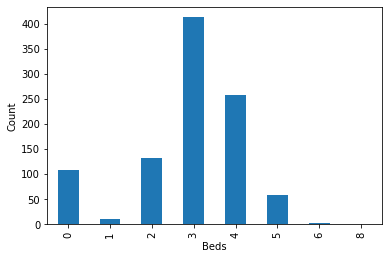

In [13]:
df['beds'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Beds')
plt.ylabel('Count');

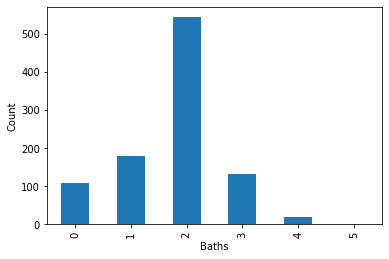

In [14]:
df['baths'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Baths')
plt.ylabel('Count');

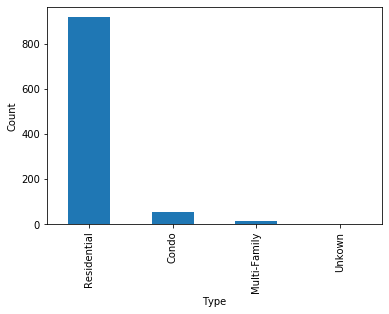

In [15]:
df['type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count');

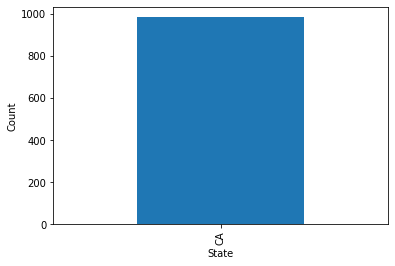

In [16]:
df['state'].value_counts().plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count');

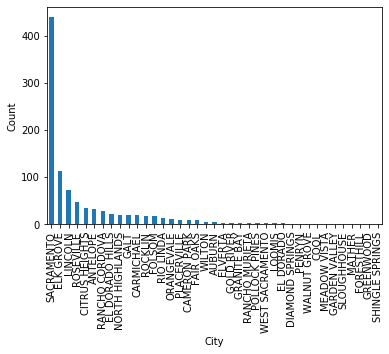

In [17]:
df['city'].value_counts().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count');

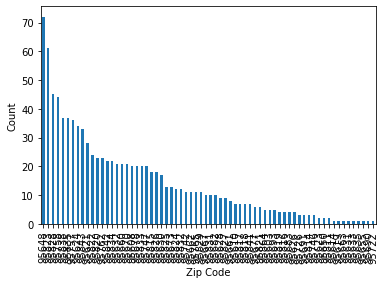

In [18]:
df['zip'].value_counts().plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Count');

There is something odd about the properties sold in terms of beds and baths. There are a large number of houses sold that have 0 beds and/or 0 baths. I would hypothesize that some of the properties sold in this dataset are empty lots. Therefore, since there is no building on the lot, there are no beds or baths on the lot.

As I mentioned earlier, it is also possible that these spaces are garages or parking structures. If that is the case, then these properties would not need any bedrooms or bathrooms.

A different explanation could be that these are not residential properties, for example a dentists office, and these properties require 0 bedrooms. However, they would still generally have a bathroom so this explanation does not explain that.

### Engineering New Variables - Part I

Empty lots have a square footage of 0. This value of 0 leads to two different interpretations of the square footage variable.

Creating a new boolean variable called "empty_lot". The value is true is the square footage is 0. Otherwise, it is false.

In [19]:
df['empty_lot'] = df['sq__ft'].map(lambda x: x==0)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False


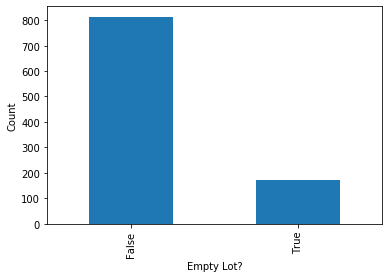

In [20]:
df['empty_lot'].value_counts().plot(kind='bar')
plt.xlabel('Empty Lot?')
plt.ylabel('Count');

### Engineering New Variables - Part II

In [21]:
df['street'].nunique()

981

The high number of unique addresses (street variable) means that this variable is not helpful for analysis or as a feature for a ML model in its current form.

Street types (ex. ave, st, way) can indicate whether a road will be quiet or busy, is in a commerical or suburban area, etc., and therefore are a more useful feature.

In [22]:
df.head(20)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,False
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,False
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,False
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,False


The last token in the street variable contains the type of street. Except for in cases of properties with unit numbers. In that case, the third to last token is the street type. Also, there are a few cases where the street type is highway, which is followed only by the highway number. Then there are some spanish terms for roads. In these cases, the street type comes directly after the house number.

In [23]:
def get_street_type(address):
    tokens = address.split()
    street_type = tokens[-1]
    if tokens[-2] == 'Unit':
        street_type = tokens[-3]
    elif not tokens[-1].isalpha():
        street_type = tokens[-2]
    elif tokens[1] == 'VIA' or tokens[1] == 'VISTA' or tokens[1] == 'AVENIDA':
        street_type = tokens[1]
    return street_type

In [24]:
df['street_type'] = df['street'].map(lambda x: get_street_type(x))
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,ST
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,CT
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,ST
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,WAY
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,DR


In [25]:
df['street_type'].nunique()

22

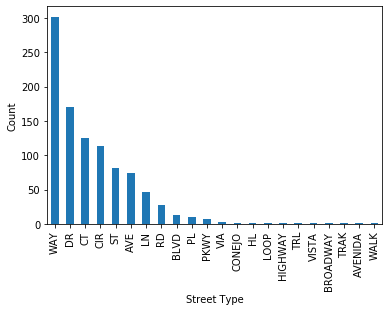

In [26]:
df['street_type'].value_counts().plot(kind='bar')
plt.xlabel('Street Type')
plt.ylabel('Count');

### Identifying Potential Dependent Variables

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
street         985 non-null object
city           985 non-null category
zip            985 non-null category
state          985 non-null category
beds           985 non-null category
baths          985 non-null category
sq__ft         985 non-null int64
type           985 non-null category
sale_date      985 non-null object
price          985 non-null int64
latitude       985 non-null float64
longitude      985 non-null float64
empty_lot      985 non-null bool
street_type    985 non-null object
dtypes: bool(1), category(6), float64(2), int64(2), object(3)
memory usage: 66.1+ KB


The data set can be used for both regression and classification problems. Variables that are appropriate for regression are integer or float values. Variables that are appropriate for classification are category values.

A variable that would make a good dependent (output) variable for a regression problem is price.

A variable that would make a good dependent (output) variable for a classification problem is beds.

### Saving the cleaned data set

In [28]:
df.to_csv('UpdatedSacramentorealestatetransactions.csv', index=False);

### Conclusion

After exploring the Sacramento real estate transaction data, some features are better than others. We changed some of the features to a category type. We created a empty_lot boolean feature to clarify what a sq ft of 0 means. And we created a street_type category to represent the type of street. This feature could possibly be used in an ML model.